#**Hand Written Digit Recognition by Convolution Neural Network**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas 
import tensorflow as tf

#Load the data

In [ ]:
model=tf.keras.models.load_model("/content/drive/MyDrive/Digit Recognition/model.h5")

In [ ]:
data_frame=pandas.read_excel("/content/drive/MyDrive/Digit Recognition/train_update.xlsx")   # Time 6m 52s

In [ ]:
training_data=32000 
train_X=np.zeros((training_data,28,28))
train_Y=np.zeros((training_data,10))
for i in range(training_data):
    temp=list(data_frame.iloc[i,:])
    train_Y[i,temp[0]-1]=1
    temp=np.array(temp[1:len(temp)])
    temp=temp.reshape((28,28))

    for j in range(28):
      for k in range(28):
        train_X[i,j,k]=temp[j,k]

test_X = np.zeros((len(data_frame)-training_data,28,28))
test_Y = np.zeros((len(data_frame)-training_data,10))

for i in range(training_data,len(data_frame)):
    temp=list(data_frame.iloc[i,:])
    test_Y[i-training_data,temp[0]-1]=1
    temp=np.array(temp[1:len(temp)])
    temp=temp.reshape((28,28))

    for j in range(28):
      for k in range(28):
        test_X[i-training_data,j,k]=temp[j,k]
# Time 35s

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


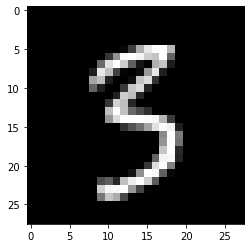

In [ ]:
# Pick a random Image and Check it 
random=np.random.randint(0,25000,1)
print(train_Y[random])
plt.imshow(train_X[random[0]],cmap='gray')

In [ ]:
def model(input_size=(28,28,1)):
    inputs = tf.keras.Input(shape=input_size)
    X = tf.keras.layers.Conv2D(filters=6,kernel_size=(3,3),padding='SAME')(inputs)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X = tf.keras.layers.ReLU()(X)
    X = tf.keras.layers.MaxPool2D(pool_size=2,strides=2)(X)
    X_shortcut = X
    # 1st Path
    X = tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='SAME')(X)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X1 = X
    # 2nd Path
    X = tf.keras.layers.Conv2D(filters=16,kernel_size=(1,1),padding='SAME')(X_shortcut)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X2 = X
    # 3rd Path
    X = tf.keras.layers.Conv2D(filters=16,kernel_size=(5,5),padding='SAME')(X_shortcut)
    X = tf.keras.layers.BatchNormalization(axis=3)(X)
    X3 = X
    # ADD
    X = tf.keras.layers.Add()([X1,X2,X3])
    X = tf.keras.layers.ReLU()(X)
    X = tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2))(X)
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(units=10,activation='softmax')(X)

    model = tf.keras.Model(inputs=inputs,outputs=X)

    return model


In [ ]:
model = model()
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 28, 28, 6)    60          input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 28, 28, 6)    24          conv2d_36[0][0]                  
__________________________________________________________________________________________________
re_lu_18 (ReLU)                 (None, 28, 28, 6)    0           batch_normalization_36[0][0]     
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_X,train_Y,batch_size=1024,epochs=25)
# Runtime 5m 22s

Epoch 1/25
32/32 [==============================] - 1s 18ms/step - loss: 1.2823 - accuracy: 0.6073
Epoch 2/25
32/32 [==============================] - 0s 15ms/step - loss: 0.3990 - accuracy: 0.8859
Epoch 3/25
32/32 [==============================] - 1s 16ms/step - loss: 0.2577 - accuracy: 0.9265
Epoch 4/25
32/32 [==============================] - 1s 16ms/step - loss: 0.1970 - accuracy: 0.9458
Epoch 5/25
32/32 [==============================] - 0s 16ms/step - loss: 0.1597 - accuracy: 0.9556
Epoch 6/25
32/32 [==============================] - 1s 16ms/step - loss: 0.1343 - accuracy: 0.9624
Epoch 7/25
32/32 [==============================] - 1s 16ms/step - loss: 0.1164 - accuracy: 0.9673
Epoch 8/25
32/32 [==============================] - 1s 16ms/step - loss: 0.1025 - accuracy: 0.9714
Epoch 9/25
32/32 [==============================] - 1s 16ms/step - loss: 0.0918 - accuracy: 0.9740
Epoch 10/25
32/32 [==============================] - 0s 15ms/step - loss: 0.0831 - accuracy: 0.9768
Epoch 11/

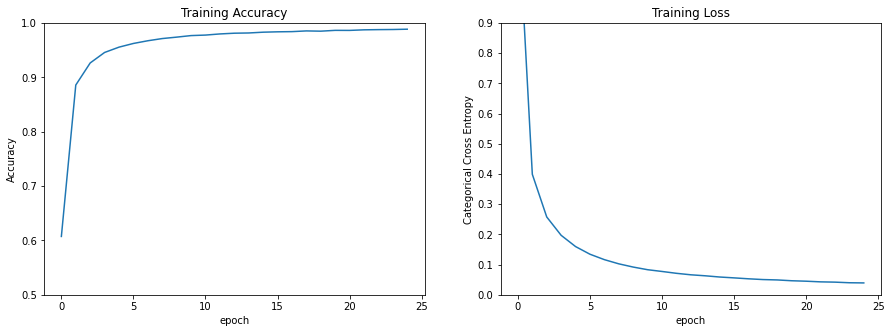

In [ ]:
loss=history.history['loss']
accuracy=history.history['accuracy']

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.ylim([0.5,1])
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.ylabel('Categorical Cross Entropy')
plt.ylim([0,0.9])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Check Test Accuracy on the model
result=model.evaluate(test_X,test_Y)
print("Test Accuracy : "+str(result[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0553 - accuracy: 0.9842
Test Accuracy : 98.42000007629395


10 random test results ------- 


[[5.6662415e-08 1.0588796e-04 2.6506625e-05 1.0237801e-06 4.5961275e-07
  1.1520398e-10 9.9824739e-01 4.3644312e-05 1.5723599e-03 2.5649056e-06]]
Predicted by Trained model : 7

Matching with result : 99.82473850250244



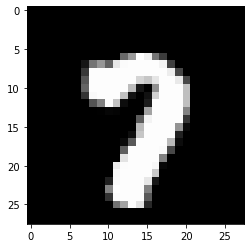





[[1.2146173e-05 9.7938275e-01 6.5107626e-04 2.3341834e-06 7.7148648e-08
  1.1559756e-07 3.1127088e-06 1.9946668e-02 1.6918389e-06 5.5664621e-08]]
Predicted by Trained model : 2

Matching with result : 97.93827533721924



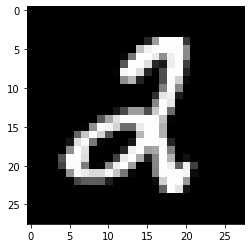





[[2.0642095e-10 1.1537231e-07 1.9939207e-05 3.1065294e-05 7.5316079e-06
  2.6669977e-11 4.0532454e-06 4.0690202e-06 9.9993324e-01 1.3770644e-11]]
Predicted by Trained model : 9

Matching with result : 99.99332427978516



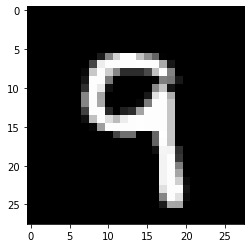





[[1.5491356e-11 1.4235486e-06 5.6296517e-04 6.8175181e-11 4.7990414e-03
  1.8433149e-05 1.0024289e-09 9.9461359e-01 4.3655282e-06 1.2161824e-07]]
Predicted by Trained model : 8

Matching with result : 99.46135878562927



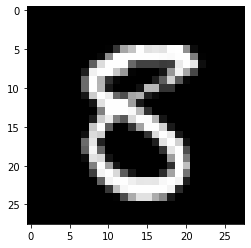





[[3.6152770e-07 9.9704558e-01 1.0047719e-05 6.1731771e-06 1.8984425e-09
  2.1393847e-08 1.5040456e-04 2.7872697e-03 1.5211508e-08 2.0350947e-07]]
Predicted by Trained model : 2

Matching with result : 99.70455765724182



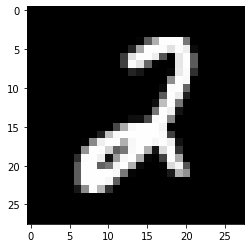





[[9.9976724e-01 1.1485984e-05 3.0924650e-05 1.0159034e-04 2.3819093e-06
  5.2329924e-08 2.8725877e-05 4.9607741e-05 7.9174451e-06 1.3319698e-08]]
Predicted by Trained model : 1

Matching with result : 99.97672438621521



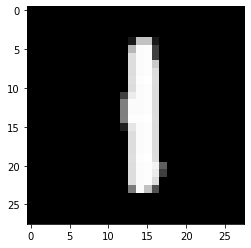





[[3.6955050e-11 2.4309360e-08 2.4083167e-09 2.1625640e-07 1.4292072e-08
  9.9999964e-01 3.9049089e-10 6.1507754e-10 3.6455139e-10 1.2432862e-07]]
Predicted by Trained model : 6

Matching with result : 99.99996423721313



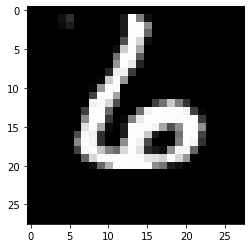





[[5.1361508e-07 1.5024750e-03 6.5682610e-03 7.1614323e-07 8.5909155e-09
  3.3906076e-11 9.9191028e-01 2.9300554e-06 1.4777436e-05 3.4912105e-08]]
Predicted by Trained model : 7

Matching with result : 99.19102787971497



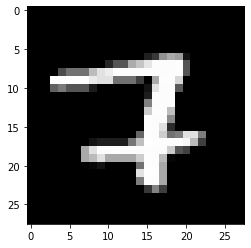





[[3.64210939e-10 1.91471131e-07 1.24948713e-06 1.00068135e-07
  3.10347588e-07 9.99853015e-01 1.23518445e-10 1.84318542e-05
  2.35185257e-06 1.24273967e-04]]
Predicted by Trained model : 6

Matching with result : 99.98530149459839



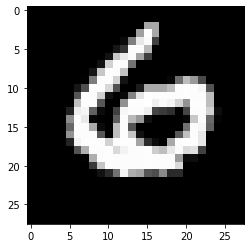





[[3.8536521e-10 2.3223726e-07 1.7082395e-05 9.9320241e-10 2.6604179e-05
  2.1155547e-07 2.7309928e-09 9.9995482e-01 1.0736974e-06 1.3765553e-08]]
Predicted by Trained model : 8

Matching with result : 99.99548196792603



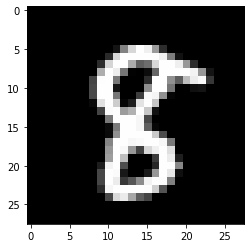

In [ ]:
random_number = np.random.randint(low=0,high=test_X.shape[0],size=10)
print("10 random test results ------- \n\n")
for i in random_number:
    plt.imshow(test_X[i].reshape(227,227),cmap='gray')
    temp=test_X[i].reshape((1,28,28))
    prediction=model.predict(temp)
    print(prediction)
    number=np.argmax(prediction)+1
    if number==10:
        number=0
    print("Predicted by Trained model : "+str(number)+"\n")
    print("Matching with result : "+str(prediction[0,np.argmax(prediction)]*100)+"\n")
    plt.show()
    print("\n\n\n")

In [ ]:
model.save("/content/drive/MyDrive/Digit Recognition/model.h5",overwrite=True)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
 
def take_photo(filename='image.jpg', quality=0.89):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
 
from IPython.display import Image
try : os.remove("image.jpg")
except : pass
try:
  filename = take_photo()
except Exception as err:
  print(str(err))

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.preprocessing import image
img_path = "image.jpg"
img = image.load_img(img_path,target_size=(28,28,1))
x = image.img_to_array(img)
x = tf.image.rgb_to_grayscale(x)
plt.imshow(np.squeeze(x),cmap='gray')
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
number = np.argmax(prediction)+1
if number==10:
    number=0
print("Prediction by Model for uploaded image : "+str(number)+'\n\n')